In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("201008_marketing_customer_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
data_filtered = data.select_dtypes('number')
data_filtered

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### X-y split.

In [9]:
y = data_filtered['Total Claim Amount']
x = data_filtered.drop('Total Claim Amount', axis=1)
# predicting y with x
# total claim amount will be the y. For x drop column total claim amount

In [10]:
x = x.select_dtypes('number')

In [11]:
len(x.columns)

7

### Normalize (numerical) 

In [6]:
# we don't normalize the y
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data_filtered)
x_normalized = transformer.transform(data_filtered)
x_normalized

array([[4.90479814e-02, 9.98772156e-01, 1.22463800e-03, ...,
        0.00000000e+00, 1.77483768e-05, 6.82977323e-03],
       [9.87006407e-01, 0.00000000e+00, 1.32929472e-02, ...,
        0.00000000e+00, 1.13131466e-03, 1.60005358e-01],
       [2.55477793e-01, 9.66746974e-01, 2.14096978e-03, ...,
        0.00000000e+00, 3.96475885e-05, 1.12296293e-02],
       ...,
       [9.95277200e-01, 0.00000000e+00, 1.03625303e-02, ...,
        3.65736364e-04, 2.43824242e-04, 9.64062747e-02],
       [3.24247237e-01, 9.45493129e-01, 4.13688256e-03, ...,
        0.00000000e+00, 1.29277580e-04, 2.97855545e-02],
       [9.89138089e-01, 0.00000000e+00, 2.91609456e-02, ...,
        0.00000000e+00, 3.78713580e-04, 1.39972539e-01]])

In [7]:
# get names of columns to change the name in the next step
data_filtered.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [37]:
# transform x_normalized array to dataframe and change column names.
x_normalized = pd.DataFrame(data=x_normalized)
x_normalized.columns = x_normalized.columns.astype(str)
x_normalized.columns
x_normalized.rename(columns={'0':'Customer Lifetime Value', '1':'Income', '2':'Monthly Premium Auto', '3':'Months Since Last Claim', '4':'Months Since Policy Inception', '5':'Number of Open Complaints', '6':'Number of Policies', '7':'Total Claim Amount'}, inplace=True)
x_normalized.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


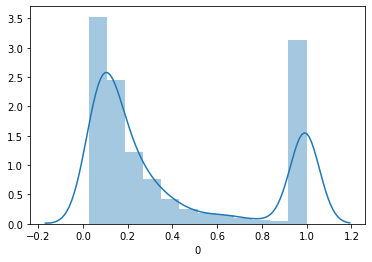

In [25]:
#Plot
sns.distplot(x_normalized[0])
plt.show()